In [1]:
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px


# Pre-processing


In [2]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [3]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+',' ',text)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = word_tokenize(text)
    text = [item for item in text if item not in stop_words]
    text = [lemma.lemmatize(w) for w in text]
    text = [i for i in text if len(i)>2]
    text = ' '.join(text)
    return text

In [4]:
df = pd.read_csv(r'C:\Users\Checkout\Downloads\cyberbullying_tweets.csv')

In [5]:

df.sample(10)

,tweet_text,cyberbullying_type
34232,Mom brutally attacked by teen girls outside CA...,age
11050,.@feministlah @GreenWeiner Way way more than o...,gender
39371,"WTF, is the government full of white school ya...",age
21528,"@Facebook Muslims are coming into the country,...",religion
3885,@howxg @CTFleaMarkets http://t.co/oCBCQYL8o5,not_cyberbullying
41922,Dese crackers can't hold him back!!!! “@tayyou...,ethnicity
11146,"In the last few days, many Americans had a mel...",gender
6860,so sofro bullying pelos meus amigos pqp,not_cyberbullying
24751,@murderofcrows github shut them down.,other_cyberbullying
29183,RT @__kjc16: if I got to be a bitch imma be a ...,other_cyberbullying


In [6]:
df.dtypes

tweet_text            object
cyberbullying_type    object
dtype: object

In [7]:
df['tweet_text'] = df['tweet_text'].astype('str') 

In [8]:
df['clean_tweet'] = df['tweet_text'].apply(clean_text)

In [9]:
df['tweet_text'].head(3)

0    In other words #katandandre, your food was cra...
1    Why is #aussietv so white? #MKR #theblock #ImA...
2    @XochitlSuckkks a classy whore? Or more red ve...
Name: tweet_text, dtype: object

In [10]:
df['clean_tweet'].head(3)

0               word katandandre food crapilicious mkr
1    aussietv white mkr theblock imacelebrityau tod...
2       xochitlsuckkks classy whore red velvet cupcake
Name: clean_tweet, dtype: object

In [11]:
age_df = df[df['cyberbullying_type'] == 'age']
religion_df = df[df['cyberbullying_type'] == 'religion']
gender_df = df[df['cyberbullying_type'] == 'gender']
not_cyberbullying_df = df[df['cyberbullying_type'] == 'not_cyberbullying']
other_cyberbullying_df = df[df['cyberbullying_type'] == 'other_cyberbullying']


In [12]:
# df.sample(10)

# Word Cloud for all tweets

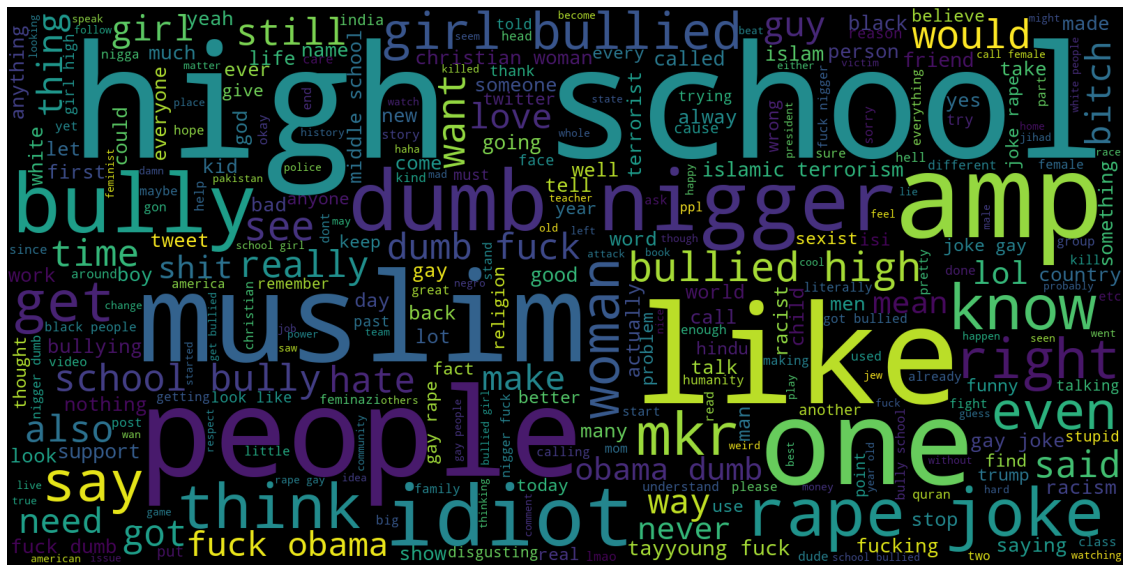

In [13]:
plt.figure(figsize=(20,20))
STOPWORDS = set(stopwords.words('english'))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=STOPWORDS).generate(str(" ".join(df.clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


# Word Cloud for Bullying tweets on age

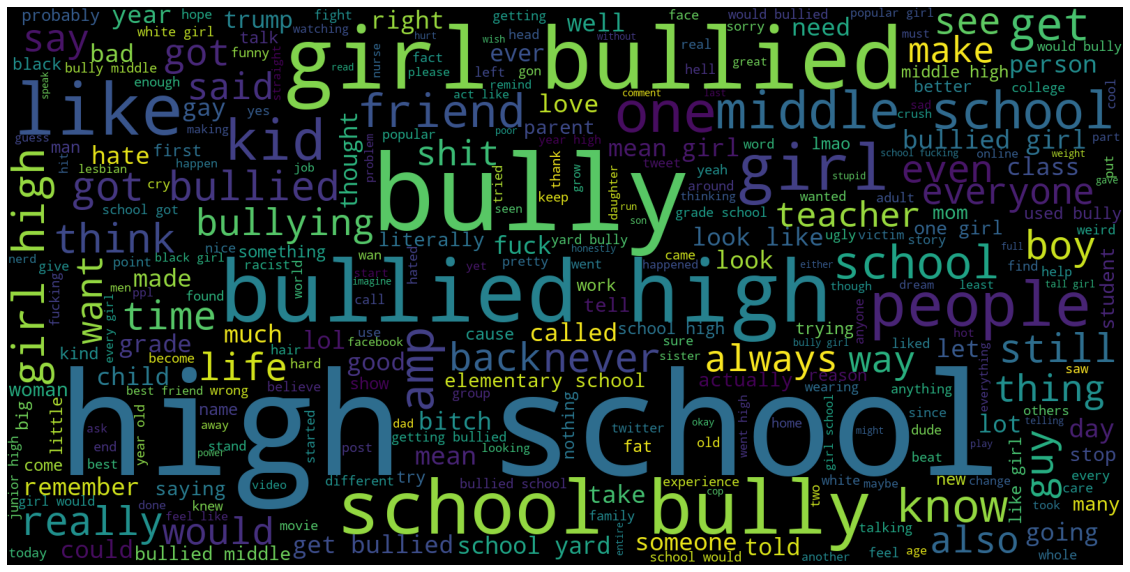

In [14]:
plt.figure(figsize=(20,20))
STOPWORDS = set(stopwords.words('english'))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=STOPWORDS).generate(str(" ".join(age_df.clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


# Word Cloud for Bullying tweets on religion

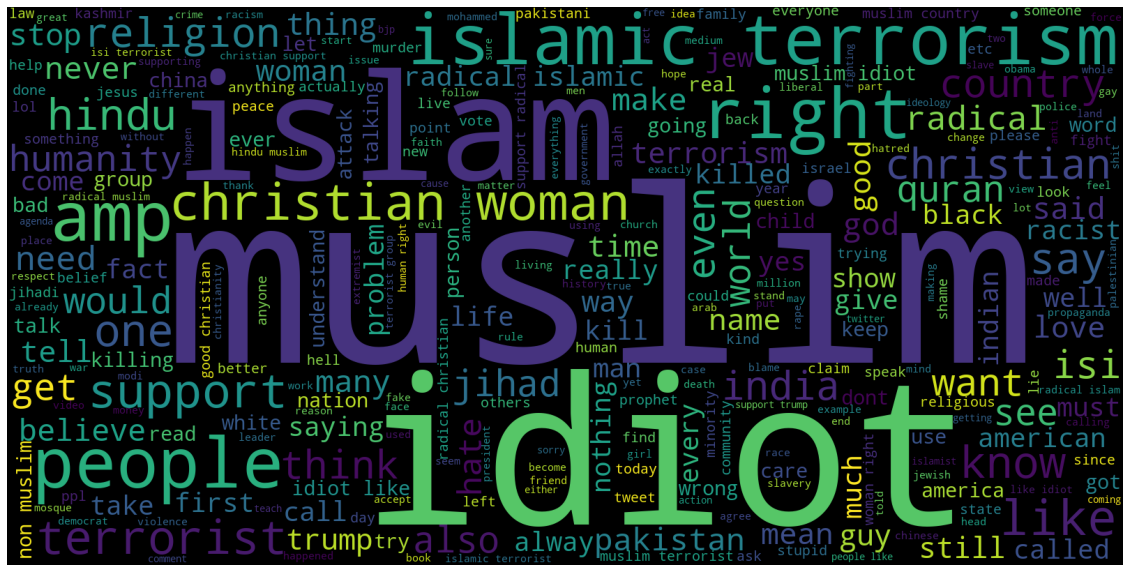

In [15]:
plt.figure(figsize=(20,20))
STOPWORDS = set(stopwords.words('english'))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=STOPWORDS).generate(str(" ".join(religion_df.clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


# Word Cloud for Bullying tweets on gender

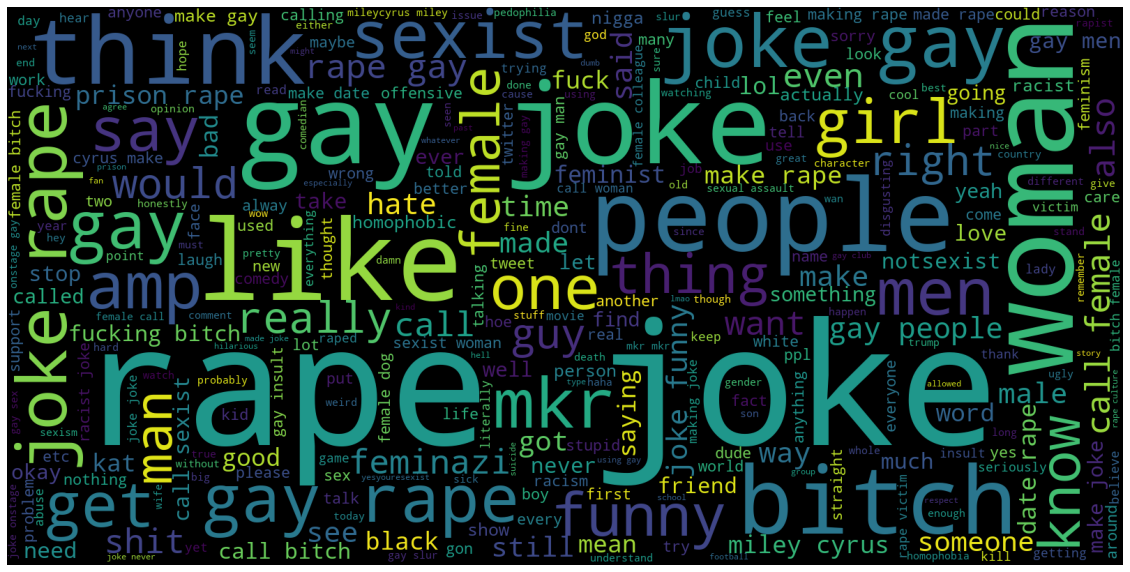

In [16]:
plt.figure(figsize=(20,20))
STOPWORDS = set(stopwords.words('english'))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=STOPWORDS).generate(str(" ".join(gender_df.clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


# Word Cloud for tweets which are not Cyberbullying

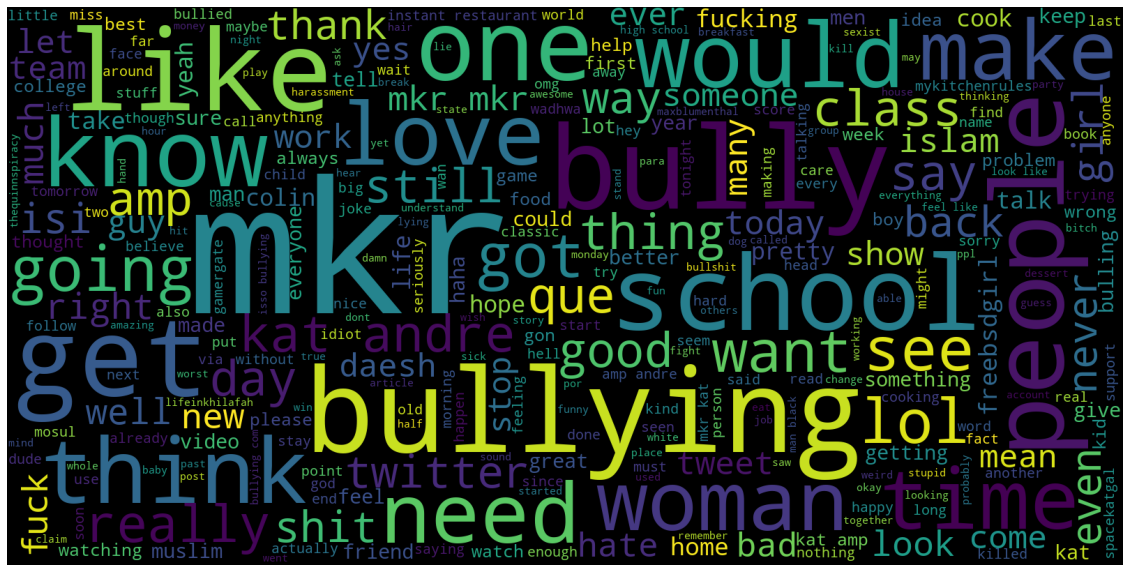

In [17]:
plt.figure(figsize=(20,20))
STOPWORDS = set(stopwords.words('english'))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=STOPWORDS).generate(str(" ".join(not_cyberbullying_df.clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


# Word Cloud for other kind of Bullying tweets

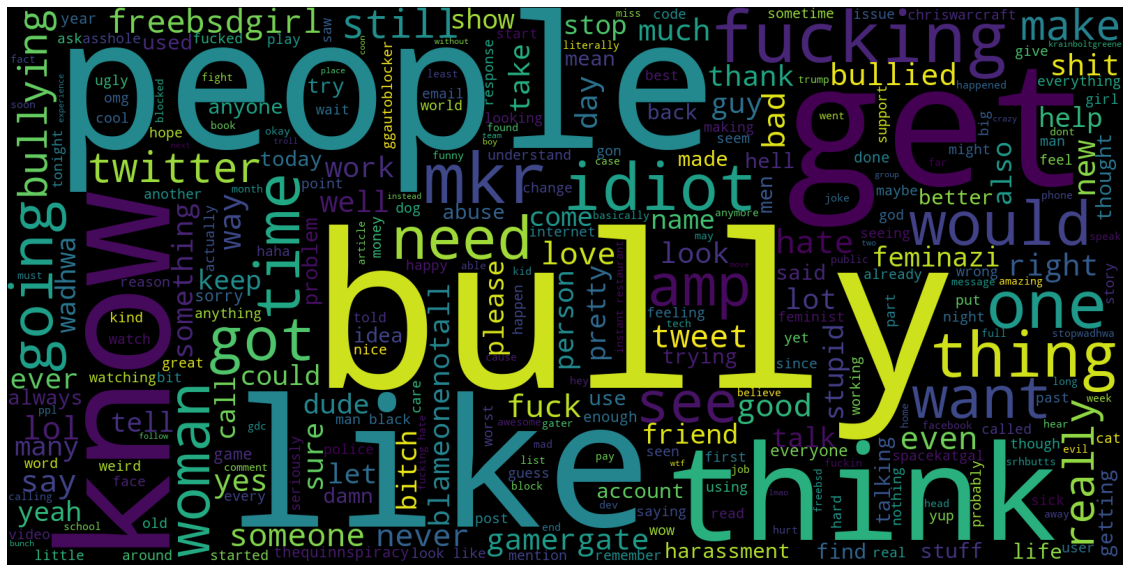

In [18]:
plt.figure(figsize=(20,20))
STOPWORDS = set(stopwords.words('english'))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=STOPWORDS).generate(str(" ".join(other_cyberbullying_df.clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


# Top 10 words for each cyber bullying type

In [20]:
for cyber_type in df.cyberbullying_type.unique():
    
    top10_word = df.clean_tweet[df.cyberbullying_type==cyber_type].str.split(expand=True).stack().value_counts()[:10]

    fig = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top10_word.values])
    fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
    
    fig.update_layout(title=f"Top 10 words for {cyber_type}",
                     template='simple_white',
                     hovermode='x unified')
    fig.show()
